<a href="https://colab.research.google.com/github/heosooyoun/LLM/blob/main/3_6_%EB%A9%80%ED%8B%B0%ED%97%A4%EB%93%9C_%EC%96%B4%ED%85%90%EC%85%98_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter2. 텍스트 데이터 다루기**

In [1]:
!pip install tiktoken

from importlib.metadata import version

print("파이토치 버전:", version("torch"))
print("tiktoken 버전:", version("tiktoken"))


파이토치 버전: 2.8.0+cu126
tiktoken 버전: 0.12.0


In [2]:
import os
import urllib.request

if not os.path.exists("the-verdict.txt"):
    url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
    file_path = "the-verdict.txt"
    urllib.request.urlretrieve(url, file_path)

with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("총 문자 개수:", len(raw_text))
print(raw_text[:99])

총 문자 개수: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [3]:
import re
text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)


['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [4]:
result = re.split(r'([,.]|\s)', text)

print(result)


# 각 항목에서 공백을 삭제하고 빈 문자열을 제외합니다.
result = [item for item in result if item.strip()]
print(result)


# 물음표나 구둣점 문자 처리
text = "Hello, world. Is this-- a test?"

result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
result = [item.strip() for item in result if item.strip()]
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']
['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']
['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [5]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

print(len(preprocessed))

all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print()
print(vocab_size)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']
4690

1130


In [6]:
vocab = {token:integer for integer, token in enumerate(all_words)}

for i, item in enumerate(vocab.items()):
  print(item)
  if i >=50:
    break;

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


In [7]:
class SimpleTokenizweV1:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

    # 텍스트를 토큰 id로 변경
  def encode(self, text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

      preprocessed = [item.strip() for item in preprocessed if item.strip()]
      ids = [self.str_to_int[s] for s in preprocessed]
      return ids

    # 토큰 id를 텍스트 변경
  def decode(self, ids):
      text = " ".join([self.int_to_str[i] for i in ids])
      # 구둣점 문자 앞의 공백을 삭제합니다.
      text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text


In [8]:
tokenizer = SimpleTokenizweV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)
print()
print(tokenizer.decode(tokenizer.encode(text)))


[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]

" It' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.


In [9]:
# 알지 못하는 단어 표현 토큰: <|unk|>
# 텍스트의 끝을 표현하는 토큰: <|endoftext|>
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

len(vocab.items())


for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)


('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


unkown 토큰 추가 후 텍스트 토큰화

In [10]:
class SimpleTokenizerV2:
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {i:s for s,i in vocab.items()}

    # 텍스트를 토큰 id로 변경
  def encode(self, text):
      preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

      preprocessed = [item.strip() for item in preprocessed if item.strip()]
      preprocessed = [ #unk 토큰 추가
          item if item in self.str_to_int
          else "<|unk|>" for item in preprocessed
      ]

      ids = [self.str_to_int[s] for s in preprocessed]
      return ids

    # 토큰 id를 텍스트 변경
  def decode(self, ids):
      text = " ".join([self.int_to_str[i] for i in ids])
      # 구둣점 문자 앞의 공백을 삭제합니다.
      text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
      return text


In [11]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)
print()

tokenizer.encode(text)

tokenizer.decode(tokenizer.encode(text))

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.



'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

# **Chpter3. 어텐션 매커니즘 구현하기**

In [12]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

# 어텐션 점수 계산하기
query = inputs[1] # 두번째 입력을 쿼리라고 가정

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)
    # 점곱 (1차원 벡터이므로 전치가 필요 없습니다)

print(attn_scores_2)

# 정규화 되지 않은 어텐션 점수를 합이 1이 되도록 정규화
attn_weights_2_temp = attn_scores_2 / attn_scores_2.sum()
print("어텐션 가중치: ", attn_weights_2_temp)
print("합: ", attn_weights_2_temp.sum())

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
어텐션 가중치:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
합:  tensor(1.0000)


점곱 예시

[0.43, 0.15, 0.89]
[0.55, 0.87, 0.66]

이 두 벡터의 각 요소들을 각각 곱하고 더한 것

(0.43 * 0.55) + (0.15 * 0.87) + (0.89 * 0.66)

In [13]:
# 보통 실전에서는 소프트맥스 함수로 정규화 하는것이 일반적 + 권장
# 아래는 단순 소프트맥스 함수 구현
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0) #exp(): 지수함수를 적용

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("어텐션 가중치:", attn_weights_2_naive)
print("합:", attn_weights_2_naive.sum())

attn_weights_2 = torch.softmax(attn_scores_2, dim=0)

print("어텐션 가중치:", attn_weights_2)
print("합:", attn_weights_2.sum())


어텐션 가중치: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
합: tensor(1.)
어텐션 가중치: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
합: tensor(1.)


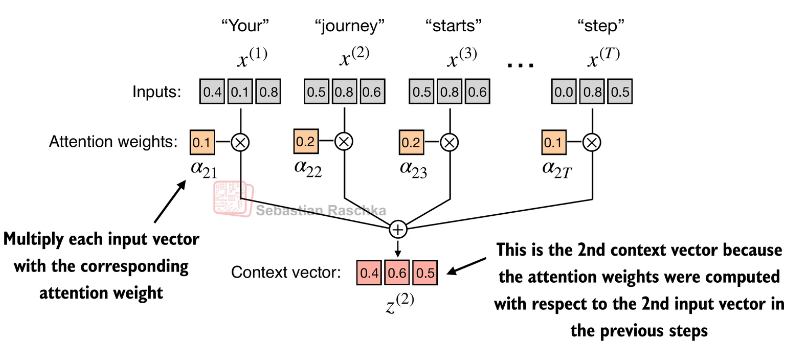

어텐션 가중치: 두 벡터가 얼마나 가까운지  => 점수가 높으면 두 벡터 사이의 관계가 가깝다

어텐션 가중치 * 입력벡터(벨류) = 모두 더하면 문맥 벡터

In [14]:
#임베딩된 입력토큰과 어텐션 가중치를 곱하고 결과 벡더를 더해 문맥 벡터를 계산

query = inputs[1]
context_vec_2 = torch.zeros(query.shape)

for i, x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i]


print(context_vec_2)

tensor([1., 1., 1.])


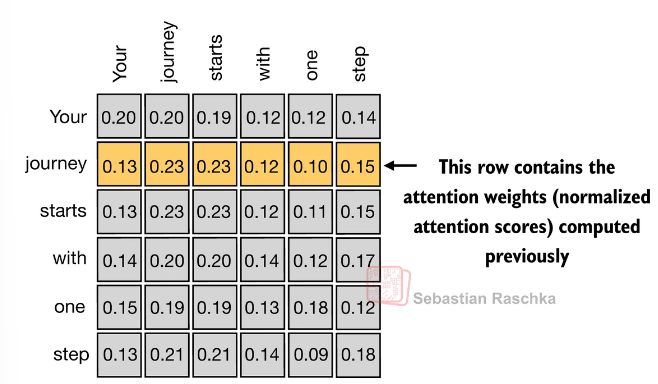

모든 입력은 쿼리 토큰이 될 수 있음 => 어텐션 가중치가 6 * 6 = 36개

In [15]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs): # 모든 입력벡터가 쿼리 토큰이 됌
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j) # 모든 입력을 점곱

print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [16]:
# 행렬 곱셈으로 더 효율적인 계산 가능
# [6,3] 크기의 입력을 역치해서 [3,6] 두개를 행렬 곱셈
# [6,3]@[3,6] = [6,6]
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [17]:
# softmax를 이용해 정규화
attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

# 문맥벡터 계산
all_context_vecs = attn_weights @ inputs # [6,6] @ [6,3] = [6,3]
print(all_context_vecs)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


# 3.4 훈련 가능한 가중치를 가진 셀프 어텐션 구현하기


#### 3.4.1 단계별로 어텐션 가중치 계산하기

- 특정 입력 원소에 대한 입력 벡터의 가중치 합으로 문맥 벡터를 계산합니다.
- 쿼리벡터, 키벡터, 벨류 벡터를 입력 임베딩을 그대로 사용하지 않고 가중치를 곱해서 사용

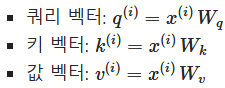

In [18]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

x_2 = inputs[1] # 두 번째 입력 원소
d_in = inputs.shape[1] # 입력 임베딩 크기, d=3
d_out = 2 # 출력 임베딩 크기, d=2

torch.manual_seed(123)

#3x2 행렬 쿼리, 키, 벨류 벡터 만들기
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key   = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

# 각 벡터 계산

query_2 = x_2 @ W_query # 두 번째 입력 원소에 대한 값을 계산하므로 _2로 씁니다.
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4306, 1.4551])


In [19]:
# inputs 전체에 적용
keys = inputs @ W_key
values = inputs @ W_value

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


In [20]:
# 쿼리 벡터와 키 값을 곱해서 어텐션 점수 계산
keys_2 = keys[1] # 파이썬 인덱스는 0부터 시작합니다.
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

attn_scores_2 = query_2 @ keys.T # 주어진 쿼리에 대한 모든 어텐션 점수
print(attn_scores_2)

tensor(1.8524)
tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


이전과 차이점은 임베딩 차원의 제곱근image.png (즉, d_k**0.5)로 나누어 어텐션 점수의 스케일을 조정하는 것입니다.

In [21]:
#소프트맥스 함수를 이용해 정규화
d_k = keys.shape[1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim=-1)
print(attn_weights_2)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [22]:
#어텐션 가중치와 벨류 벡터를 곱한 뒤 모두 더해서 문맥 벡터를 만든다
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


#### 3.4.2 셀프 어텐션 파이썬 클래스 구현하기

- 지금까지 한 것들을 모두 합쳐서 셀프 어텐션 메커니즘을 구현한다

In [23]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

  def __init__(self, d_in, d_out):
     super().__init__()
     self.W_query = nn.Parameter(torch.rand(d_in, d_out))
     self.W_key = nn.Parameter(torch.rand(d_in, d_out))
     self.W_value = nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):
    keys = x @ self.W_key
    queries = x @ self.W_query
    values = x @ self.W_value

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim =-1
    )

    context_vec = attn_weights @ values
    return context_vec

torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


- 이 구현을 행렬 곱셈과 동등한 연산을 수행하는 편향 유닛이 없는 파이토치 Linear 층을 사용해 간소화할 수 있습니다.
- nn.Parameter(torch.rand(...) 대신에 nn.Linear를 사용하는 또 다른 큰 장점은 안정적으로 모델을 훈련하는데 도움이 되는 가중치 초기화를 제공한다는 것입니다.

In [24]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


### 3.5 코잘 어텐션으로 미래의 단어 감추기

- 마스크드 셀프 어텐션이라고도 부름
- 주 대각선 위쪽을 0으로 마스킹
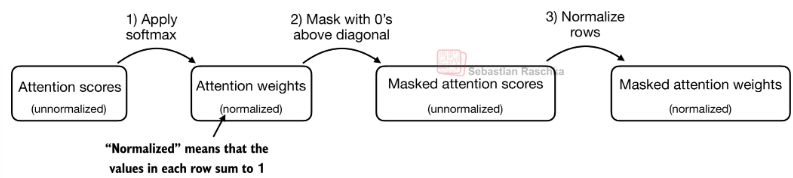



In [25]:
# 편의상 이전 절에서 만든 SelfAttention_v2 객체의 쿼리와 키 가중치 행렬을 재사용합니다.
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T

attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


- 파이토치의 tril 함수 사용 시 주 대각선과 그 아래 함수는 1, 주대각선 위의 원소는 0인 마스크를 만들 수 있음

In [26]:
context_length = attn_scores.shape[0]
#6x6 행렬을 만든 뒤 tril 적용
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

# 어텐션 가중치와 마스크를 곱해주면 주대각선 위의 어텐션 점수를 0으로 만들 수 있음
masked_simple = attn_weights*mask_simple
print(masked_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [27]:
# 소프트맥스 이후에 마스킹을 하면 숫자가 틀어지기 때문에 재정규화 필요
row_sums = masked_simple.sum(dim=-1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


- 마스킹 위치를 음의 무한대로 바꿔버리면 소프트맥스 함수 적용하면 음의 무한대에 지수 함수를 씌우기 때문에 자동으로 0이 된다
-> 0 대신 음의 무한대로 마스킹하면 더 효율적임

In [28]:
#triu함수: 상삼각행렬 만들기
#torch.one을 이용해 6x6 행렬 만들고, 윗 부분 원소만 1로 반환받고 나머진 0
#diagonal=1 -> 주 대각선 포함하지 않음
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
#masked_fill: mask.bool() 값이 false인 것은 두고 true인 것을
#두번째 매개변수 값으로 바꿈
# 주대각선 위의 원소들이 1이니까 그 부분을 음의 무한으로 바
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [29]:
mask

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

In [30]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


#### 3.5.2 드롭아웃으로 어텐션 가중치에 추가적으로 마스킹하기

- 드롭아웃 비율 0.5(50%)를 적용하면 드롭아웃되지 않은 값은 1/0.5=2배 만큼 크기가 증가
- 스케일 조정 배율은 1 / (1 - dropout_rate)와 같이 계산합니다.


In [31]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) # 50% 드롭아웃 비율
example = torch.ones(6, 6) # 1로 채워진 행렬을 만듭니다.

print(dropout(example))

# 어텐션 가중치에 적
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])
tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


#### 3.5.3 코잘 어텐션 클래스 구현하기

In [32]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)
# 각각 여섯 개의 토큰으로 구성된 두 개의 입력. 각 토큰의 임베딩 차원은 3입니다.


torch.Size([2, 6, 3])


In [33]:
class CausalAttention(nn.Module):
  def __init__ (self, d_in, d_out, context_length,
               dropout, qkv_bias=False):
    super().__init__()
    #self.d_out = d_out
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.dropout = nn.Dropout(dropout)
    # register_buffer에 마스킹 행렬을 저장
    # 이 클래스가 gpu, cpu로 이동할 때 같이 이동함
    # 이렇게 하면 장치가 달라졌을 때 텐서 간의 연산 오류 방지
    self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

  def forward(self, x):
    # b: 배치 차원, 토큰 갯수, 토큰의 입력 차원을 변수에 저장
    # num_tokens(입력 토큰 갯수)는 항상 context_length보다 작음
    b, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    attn_scores = queries @ keys.transpose(1,2) # 키 행렬을 전치
    attn_scores.masked_fill_(
        #_이 붙은 이유는 attn_scores 객체에 바로 결과가 반영되도록 한것
        #_ : 인플레이션 연산

        #입력 토큰 크기가 context_length보다 작을 수 있기 때문에
        #고려해서 행렬의 일부분을 잘라 attns_scores에 적용한
        self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
    attn_weights = torch.softmax(
        attn_scores / keys.shape[-1]**0.5, dim=-1
    )
    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values
    return context_vec

torch.manual_seed(123)

context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0) #입력차원, 출력차원, 문맥 길이

context_vecs = ca(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)


tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


- 드롭아웃은 훈련 과정에만 적용되며 추론시에는 적용되지 않습니다.

### 3.6 싱글 헤드 어텐션을 멀티 헤드 어텐션으로 확장하기


####3.6.1 여러 개의 싱글 헤드 어텐션 층 쌓기

- 실제로는 입력벡터의 크기(차원)와 문맥벡터(결과)의 크기(차원)가 같다.



In [34]:
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias =False):
    super().__init__()
    self.heads = nn.ModuleList(
        #파이썬의 리스트 내포 함수를 이용하여 헤드 갯수만큼 반복
        #ModuleList: 모듈 여러개를 리스트처럼 관리 가능
        [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
             for _ in range(num_heads)]
        )

  def forward(self, x):
    #코젤 어텐션을 하나씩 뽑아서 입력값 x를 넣어 호출
    #cat: 토치의 메소트, dim=-1-> 마지막 차원을 따라서 이어붙
      return torch.cat([head(x) for head in self.heads], dim=-1)


torch.manual_seed(123)

context_length = batch.shape[1] # 토큰 개수
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
    d_in, d_out, context_length, 0.0, num_heads=2
)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)


tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


#### 3.6.2 가중치 분할로 멀티 헤드 어텐션 구현하기

- 아래의 그림은 위의 코드를 구현한 것
  - 가중치 행렬을 쿼리 키, 벨류 가중치 행렬을 따로 만들어서 각각 쿼리와 헤드를 향한 쿼리를 각각 만드는 것

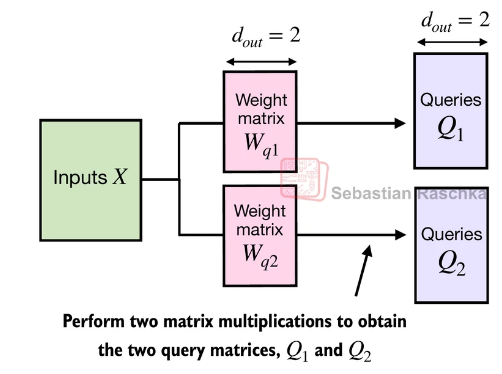

- 가중치 행렬을 헤드 갯수만금 크게 만들고 쿼리를 만들고 나눠서 사용할 수 있지 않을까(한번의 행렬 연산을 나누기)

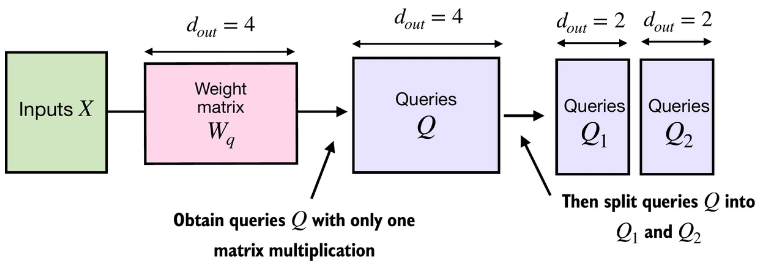

In [35]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out은 num_heads로 나누어 떨어져야 합니다"

        self.d_out = d_out
        self.num_heads = num_heads
        # 원하는 출력 차원에 맞도록 투영 차원을 낮춥니다.
        self.head_dim = d_out // num_heads

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        # Linear 층을 사용해 헤드의 출력을 결합합니다.
        # 문맥 벡터의 크기와 동일하게 맞춰준다
        self.out_proj = nn.Linear(d_out, d_out)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # `CausalAttention`과 마찬가지로, 입력의 `num_tokens`가 `context_length`를 넘는 경우 마스크 생성에서 오류가 발생합니다.
        # 실제로는 forward 메서드에 들어오기 전에 LLM이 입력이 `context_length`를
        # 넘지 않는지 확인하기 때문에 문제가 되지 않습니다.

        keys = self.W_key(x) # 크기: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)  #쿼리, 키, 벨류 만들기

        # `num_heads` 차원을 추가함으로써 암묵적으로 행렬을 분할합니다.
        # 그다음 마지막 차원을 `num_heads`에 맞춰 채웁니다: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        #d_out 문맥벡터의 크기를 헤드 갯수(num_heads) 만큼 나눠준다.
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # 전치: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        # 헤드 별로 계산하기 위해서
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # 코잘 마스크로 스케일드 점곱 어텐션(셀프 어텐션)을 계산합니다.
        attn_scores = queries @ keys.transpose(2, 3)  # 각 헤드에 대해 점곱을 수행합니다.

        # 마스크를 불리언 타입으로 만들고 토큰 개수로 마스크를 자릅니다.
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # 마스크를 사용해 어텐션 점수를 채웁니다.
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # 크기: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # 헤드를 결합합니다. self.d_out = self.num_heads * self.head_dim
        # num_heads 헤드 갯수와 head_dim헤드 차원으로 나뉘어 있던 것을 다시
        # d_out으로 view 메소드를 이용해 합쳐준다.
        # view 메소드를 사용하기 위해 contiguous 메소드를 사용해서 메모리를 복사해서 순서대로 정렬
        # transpose 메소드는 참조값만 변경하기 때문에 위같은 작업 필요
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # 투영 - 리니어 사용

        return context_vec

torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


attn_scores = queries @ keys.transpose(2, 3)가 실행될 때

In [ ]:
# (b, num_heads, num_tokens, head_dim) = (1, 2, 3, 4)
a = torch.tensor([[[[0.2745, 0.6584, 0.2775, 0.8573],
                    [0.8993, 0.0390, 0.9268, 0.7388],
                    [0.7179, 0.7058, 0.9156, 0.4340]],

                   [[0.0772, 0.3565, 0.1479, 0.5331],
                    [0.4066, 0.2318, 0.4545, 0.9737],
                    [0.4606, 0.5159, 0.4220, 0.5786]]]])

# 2,3번을 전치하면 a.transpose(2, 3) = (1,2,4,3)
# a는 그대로 (1, 2, 3, 4)
print(a @ a.transpose(2, 3)) # 두개를 곱하면 (1,2,3,3)
# 헤드 2개마다 각각 3개의 원소를 갖고있는 3차원 행렬 두개가 된다

위의 코딩은 헤드 각각을 꺼내서 반복하는 것과 결과가 같다

In [ ]:
first_head = a[0, 0, :, :]
first_res = first_head @ first_head.T
print("첫 번째 헤드:\n", first_res)

second_head = a[0, 1, :, :]
second_res = second_head @ second_head.T
print("\n두 번째 헤드:\n", second_res)